# ✈️ FlightOnTime — Predição de Atrasos em Voos

O **FlightOnTime** é um projeto de *Data Science* e *Back-End* voltado para prever a probabilidade de um voo **decolar no horário ou com atraso**, utilizando dados históricos de aviação civil.  
Ele faz parte de um desafio educacional cujo objetivo é construir um **MVP preditivo** capaz de apoiar passageiros, companhias aéreas e aeroportos na tomada de decisão.

## Descrição do projeto

### 🎯 Objetivo do Projeto

Criar um modelo de classificação binária que, a partir de informações de um voo — como companhia aérea, origem, destino, horário e distância — estima se ele será **Pontual (0)** ou **Atrasado (1)**, retornando também a probabilidade associada.

---

### 🧠 Pipeline de Data Science

O notebook conduz as principais etapas do fluxo de ciência de dados:

1. **ETL e limpeza dos dados**  
   - Carregamento, padronização e enriquecimento das informações de voos.

2. **Engenharia de variáveis (Feature Engineering)**  
   - Extração de atributos relevantes, como:  
     hora do voo, dia da semana, distância, aeroportos, companhia aérea.

3. **Modelagem preditiva**  
   - Testes com algoritmos supervisionados (ex.: Logistic Regression, Random Forest).

4. **Avaliação do modelo**  
   - Métricas como Acurácia, Precisão, Recall e F1-score.

5. **Exportação do modelo treinado**  
   - Serialização via `joblib` para uso pela API de Back-End.

---

### 🛠️ Integração com a API

O modelo gerado neste notebook será consumido por uma **API REST em Java (Spring Boot)**, que disponibilizará o endpoint:

```
POST /predict
```

Retornando:

```json
{
  "previsao": "Atrasado",
  "probabilidade": 0.78
}
```

---

### 📌 Sobre o Dataset

O projeto utiliza um conjunto de dados contendo informações reais de voos, incluindo:

- companhia aérea  
- aeroporto de origem e destino  
- data e horário de partida  
- distância do trecho  
- status de atraso  

As funções de ETL foram previamente desenvolvidas para garantir limpeza, consistência e rastreabilidade.

## 🚀 Início do Notebook

A partir daqui, o notebook executa o fluxo completo de preparação, análise e modelagem, resultando em um modelo leve, funcional e pronto para produção no MVP do FlightOnTime.

### Imports Globais

In [23]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

### Preprocessamento e Carga

Execute as funções abaixo para carregar os dados de fonte local ou para baixar, preprocessar e salvar os dados a partir da base de dados de vôos da ANAC (Agência Nacional de Aviação Civil).  
- Os dados são salvos em ./dados/  
- A função `processar_dados` acessa toda a base de dados da ANAC a partir de Janeiro/2001 até Outubro/2025.

In [2]:
def processar_dados(save: bool = True) -> pd.DataFrame:
    """
    Executa o pipeline completo de ETL dos dados de voos a partir da base de dados de vôos da ANAC (Agência Nacional de Aviação Civil).

    Baixa os arquivos CSV brutos, realiza o pré-processamento, consolida os dados
    em um único DataFrame e salva automaticamente os resultados em formatos
    CSV e Parquet no diretório ./data/, com versionamento por timestamp.

    Parâmetros
    ----------
    **save** : bool, opcional
        Indica se o DataFrame resultante deve ser salvo em disco.
        Padrão é True, o que significa que os arquivos serão salvos
        automaticamente.

    Retorna
    -------
    pd.DataFrame
        Dataset consolidado e pré-processado.
    """
    from etl.etl import getUrls, preprocess_csvs
        
    urls = getUrls()
    dataset = preprocess_csvs(urls)
    if save:
      from etl.etl import save_df
      save_df(dataset, timestamp=True)

    return dataset   


def carregar_dados(filename: str) -> pd.DataFrame:
    """
    Carrega um dataset de voos previamente pré-processado a partir de um arquivo Parquet
    e aplica conversões de tipo para colunas categóricas e de data/hora.

    Parâmetros
    ----------
    filename : str
        Nome-base do arquivo Parquet localizado em ./data/.
        Não inclua a extensão ".parquet".

    Retorna
    -------
    pd.DataFrame
        Dataset carregado com colunas categóricas convertidas para `category`
        e colunas de data/hora convertidas para `datetime`, pronto para análise
        ou modelagem.
    """
    # Função interna para converter colunas categóricas
    def parse_categoricals(df: pd.DataFrame) -> pd.DataFrame:
        categorical_columns = [
            "Empresa Aérea",
            "Código Tipo Linha",
            "Aeródromo Origem",
            "Aeródromo Destino",
        ]
        for col in categorical_columns:
            df[col] = df[col].astype('category')
        
        return df
    
    # Função interna para converter colunas de data/hora
    def parse_datetime(df: pd.DataFrame) -> pd.DataFrame:
        datetime_columns = [
            "Partida Prevista",
            "Partida Real",
        ]
        for col in datetime_columns:
            df[col] = pd.to_datetime(df[col], format="mixed", dayfirst=True, errors='coerce')
        
        return df
    
    filepath = f'{os.getcwd()}/data/{filename}.parquet'
    print(f"Carregando dataset local de: ./data/{filename}.parquet")
    dataset = pd.read_parquet(filepath)
    dataset = parse_categoricals(dataset)
    dataset = parse_datetime(dataset)
    print("🏁 Dataset carregado com sucesso!")

    return dataset

#### Preprocessar com origem externa

Baixa e executa o preprocessamento em tempo de execução através da base de dados abertos da ANAC.  
Link: https://sistemas.anac.gov.br/dadosabertos/Voos%20e%20opera%C3%A7%C3%B5es%20a%C3%A9reas/Voo%20Regular%20Ativo%20%28VRA%29/  

Para mais informações sobre o processo, consulte a documentação do módulo etl.

In [ ]:
# Código comentado por segurança
# Descomente a linha abaixo para executar o pipeline ETL completo

# df = processar_dados()

Iniciando o download e preprocessamento de 310 arquivos CSV...

[1/310] Carregando: http://.../2000/01%20-%20Janeiro/VRA_20001.csv
✔ 11743 linhas carregadas.
   Total atual de linhas: 11743
   Memória usada: 0.36 MB

[2/310] Carregando: http://.../2000/02%20-%20Fevereiro/VRA_20002.csv
✔ 9013 linhas carregadas.
   Total atual de linhas: 20756
   Memória usada: 0.65 MB

[3/310] Carregando: http://.../2000/03%20-%20Mar%C3%A7o/VRA_20003.csv
✔ 10581 linhas carregadas.
   Total atual de linhas: 31337
   Memória usada: 0.98 MB

[4/310] Carregando: http://.../2000/04%20-%20Abril/VRA_20004.csv
✔ 10356 linhas carregadas.
   Total atual de linhas: 41693
   Memória usada: 1.30 MB

[5/310] Carregando: http://.../2000/05%20-%20Maio/VRA_20005.csv
✔ 8781 linhas carregadas.
   Total atual de linhas: 50474
   Memória usada: 1.58 MB

[6/310] Carregando: http://.../2000/06%20-%20Junho/VRA_20006.csv
✔ 10343 linhas carregadas.
   Total atual de linhas: 60817
   Memória usada: 1.90 MB

[7/310] Carregando: ht

#### Preprocessar com origem local

Exemplo de nome de arquivo local:  
```python
filename = "vra_master_20250101_153000"
```

- Não necessita informar o caminho do arquivo e extensão.  
- Caminho default: ./data
- Extensão default: .parquet

In [3]:
filename = "vra_master_20251213_172116"
df = carregar_dados(filename=filename)

Carregando dataset local de: ./data/vra_master_20251213_172116.parquet
🏁 Dataset carregado com sucesso!


#### Visualizações

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564548 entries, 0 to 13564547
Data columns (total 6 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Empresa Aérea      category      
 1   Código Tipo Linha  category      
 2   Aeródromo Origem   category      
 3   Aeródromo Destino  category      
 4   Partida Prevista   datetime64[ns]
 5   Partida Real       datetime64[ns]
dtypes: category(4), datetime64[ns](2)
memory usage: 297.6 MB


In [5]:
df

,Empresa Aérea,Código Tipo Linha,Aeródromo Origem,Aeródromo Destino,Partida Prevista,Partida Real
0,NES,R,SBSN,SBBE,2000-01-01 18:04:00.000,2000-01-01 16:46:00
1,NES,R,SBMO,SBRF,2000-01-01 17:30:00.000,2000-01-01 19:10:00
2,TBA,N,SBRJ,SBSP,2000-01-01 11:24:00.000,2000-01-01 11:41:00
3,VRG,N,SBGR,SBFI,2000-01-01 20:54:00.000,2000-01-01 21:12:00
4,VRG,N,SBSV,SBBR,2000-01-01 17:20:00.000,2000-01-01 18:30:00
...,...,...,...,...,...,...
13564543,AZU,N,SBSV,SBKP,2025-10-02 02:50:00.100,2025-10-02 02:43:00
13564544,TAM,N,SBFZ,SBGL,2025-10-02 18:20:00.000,2025-10-02 18:34:00
13564545,TAM,N,SBBR,SBRJ,2025-10-24 09:35:00.000,2025-10-24 09:29:00
13564546,GLO,N,SBBE,SBBR,2025-10-22 05:00:00.000,2025-10-22 04:48:00


#### Refinar ETL

Nesta seção verificamos se algum dado nulo ou indesejado passou pelo processo bruto de ETL e aperfeiçoamos o dataset.

In [5]:
def check_nulls(df: pd.DataFrame, col: str) -> None:
    nulls_notice = f'Coluna "{col}" possui {df[col].isna().sum()} valores nulos.'
    print(nulls_notice)
    return

def check_uniques(df: pd.DataFrame, col: str) -> None:
    print(f'Coluna "{col}":')
    print(f'{df[col].unique()}\n')
    return

##### Verificando Nulos

In [7]:
for col in df.columns:
    check_nulls(df, col)

Coluna "Empresa Aérea" possui 0 valores nulos.
Coluna "Código Tipo Linha" possui 250 valores nulos.
Coluna "Aeródromo Origem" possui 0 valores nulos.
Coluna "Aeródromo Destino" possui 0 valores nulos.
Coluna "Partida Prevista" possui 0 valores nulos.
Coluna "Partida Real" possui 0 valores nulos.


##### Verificando Uniques

In [8]:
for col in df.columns:
    check_uniques(df, col)

Coluna "Empresa Aérea":
['NES', 'TBA', 'VRG', 'RSL', 'TAM', ..., 'BPC', 'MLM', 'IWY', 'ARU', 'AEB']
Length: 250
Categories (250, object): ['1DE', '1ED', 'AAL', 'ABB', ..., 'VVC', 'WAL', 'WEB', 'WFL']

Coluna "Código Tipo Linha":
['R', 'N', 'I', 'L', 'E', 'C', 'G', 'H', NaN, 'X']
Categories (9, object): ['C', 'E', 'G', 'H', ..., 'L', 'N', 'R', 'X']

Coluna "Aeródromo Origem":
['SBSN', 'SBMO', 'SBRJ', 'SBGR', 'SBSV', ..., 'LMML', 'MUGM', 'MTCH', 'EGPK', 'FNBJ']
Length: 622
Categories (622, object): ['1AON', '2NHT', '6ASO', 'CYHM', ..., 'ZHCC', 'ZSAM', 'ZSHC', 'ZUUU']

Coluna "Aeródromo Destino":
['SBBE', 'SBRF', 'SBSP', 'SBFI', 'SBBR', ..., 'LMML', 'KSDF', 'FNBJ', 'MUGM', 'MTCH']
Length: 624
Categories (624, object): ['2NHT', '6ASO', 'BIKF', 'CYHM', ..., 'ZSAM', 'ZSHC', 'ZSNJ', 'ZUUU']

Coluna "Partida Prevista":
<DatetimeArray>
[       '2000-01-01 18:04:00',        '2000-01-01 17:30:00',
        '2000-01-01 11:24:00',        '2000-01-01 20:54:00',
        '2000-01-01 17:20:00',        '

##### Eliminando os Nulos

In [6]:
df = df.dropna(subset="Código Tipo Linha")
check_nulls(df, "Código Tipo Linha")

Coluna "Código Tipo Linha" possui 0 valores nulos.


#### Engenharia de Features

Nesta seção transformamos as colunas `Partida Prevista` e `Partida Real` em features separadas:
- `Data do Voo` *datetime64[ns]*  
    - Data em que o vôo ocorreu.  

- `Horario_min` *int16*  
    - Horário do dia em que o vôo ocorreu em *minutos*.  
    *0 = 00:00, 1439 = 23:59*
- `Dia da Semana` *int8*  
    - Dia da semana em que o vôo ocorreu.  
    *0 = Segunda, 6 = Domingo*

A variável dependente (X) `Atrasado` é gerada a partir da comparação entre `Partida Prevista` e `Partida Real`.  

Por fim, eliminamos as variáveis originais `Partida Prevista` e `Partida Real`.

##### Data do Vôo

In [7]:
# Ativa o modo copy-on-write do pandas para evitar SettingWithCopyWarning
pd.options.mode.copy_on_write = True

df['Data do Voo'] = df['Partida Prevista'].dt.date
df['Data do Voo'] = pd.to_datetime(df['Data do Voo'], dayfirst=True, errors='coerce') # Transforma em Datetime

##### Horário do Vôo

In [ ]:
# 0 = 0:00, 1439 = 23:59
df['Horario_min'] = (
    df['Partida Prevista'].dt.hour * 60 + # type: ignore
    df['Partida Prevista'].dt.minute # type: ignore
).astype('int16')

##### Dia da Semana

In [ ]:
# 0 = Segunda, 6 = Domingo
df['Dia da Semana'] = df['Partida Prevista'].dt.weekday.astype('int8') # type: ignore

##### Atrasado (X)

In [ ]:
# 1 = Atrasado, 0 = No Horario
df['Atrasado'] = (df['Partida Real'] > df['Partida Prevista']).astype('int8')

##### Eliminando Variáveis Originais

In [11]:
df = df.drop(columns=["Partida Prevista", "Partida Real"])

##### Verificando

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13564298 entries, 0 to 13564547
Data columns (total 8 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Empresa Aérea      category      
 1   Código Tipo Linha  category      
 2   Aeródromo Origem   category      
 3   Aeródromo Destino  category      
 4   Data do Voo        datetime64[ns]
 5   Horario_min        int16         
 6   Dia da Semana      int8          
 7   Atrasado           int8          
dtypes: category(4), datetime64[ns](1), int16(1), int8(2)
memory usage: 349.3 MB


In [12]:
df

,Empresa Aérea,Código Tipo Linha,Aeródromo Origem,Aeródromo Destino,Data do Voo,Horario_min,Dia da Semana,Atrasado
0,NES,R,SBSN,SBBE,2000-01-01,1084,5,0
1,NES,R,SBMO,SBRF,2000-01-01,1050,5,1
2,TBA,N,SBRJ,SBSP,2000-01-01,684,5,1
3,VRG,N,SBGR,SBFI,2000-01-01,1254,5,1
4,VRG,N,SBSV,SBBR,2000-01-01,1040,5,1
...,...,...,...,...,...,...,...,...
13564543,AZU,N,SBSV,SBKP,2025-10-02,170,3,0
13564544,TAM,N,SBFZ,SBGL,2025-10-02,1100,3,1
13564545,TAM,N,SBBR,SBRJ,2025-10-24,575,4,0
13564546,GLO,N,SBBE,SBBR,2025-10-22,300,2,0


In [13]:
for col in df.columns:
    check_nulls(df, col)

Coluna "Empresa Aérea" possui 0 valores nulos.
Coluna "Código Tipo Linha" possui 0 valores nulos.
Coluna "Aeródromo Origem" possui 0 valores nulos.
Coluna "Aeródromo Destino" possui 0 valores nulos.
Coluna "Data do Voo" possui 0 valores nulos.
Coluna "Horario_min" possui 0 valores nulos.
Coluna "Dia da Semana" possui 0 valores nulos.
Coluna "Atrasado" possui 0 valores nulos.


#### Visualizando (Y)

Aqui analisamos a distribuição dos vôos atrasados no histórico de vôos observados.  

- Aproximadamente 8.5 milhões de vôos foram pontuais.  
- Aproximadamente 5 milhões de vôos atrasaram, totalizando aproximadamente 36.45% dos vôos observados.  

Atrasado
0    8619548
1    4944750
Name: count, dtype: int64
Atrasado
0    0.635458
1    0.364542
Name: proportion, dtype: float64


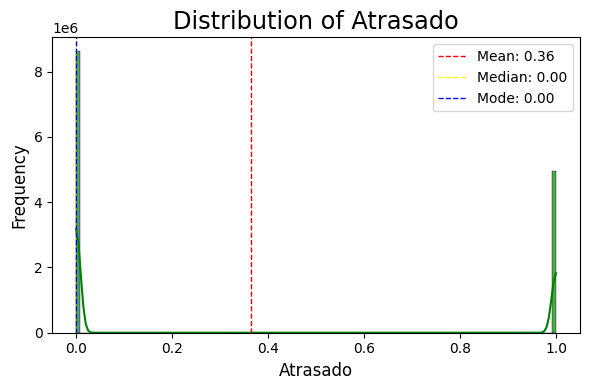

In [20]:
from utils.plot_feature import plot_feature
print(df['Atrasado'].value_counts())
print(df['Atrasado'].value_counts(normalize=True))
plot_feature(df, 'Atrasado')

#### Separando X e Y

Aqui separaremos as features (X) da variável alvo (Y).

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['Atrasado']),
    df['Atrasado'],
    test_size=0.3,
    random_state=42,
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9495008, 7), (4069290, 7), (9495008,), (4069290,))